# Estudo de Insights de Best Sellers 
## Best Sellers insights study

Os dados utilizados foram disponibilizados no Kaggle por Diógenes Silva. O propósito é estudar e demonstrar formas de utilizar os dados para gerar insights para uma editora especializada em Best Sellers. Nesse caso, busca-se entender quais são os livros que fazem mais sucesso vendidos na Amazon.

The data used was disponibilized at Kaggle by Diógeneses Silva. The purpose of this notebook is to study and demonstrate ways to utilize data do generate insights for a best seller specialized publisher. In this case, we whant to know which books achieved most sucess at Amazon. 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
amazon = pd.read_csv('../input/bestsellers-books-amazon-ebay-and-barnesnoble/amazon_products.csv')

In [3]:
print(amazon.shape)

(62, 6)


#### Preparando dados da Amazon

#### Prepararing Amazon dataset

In [4]:
a = amazon.shape[0]
amazon.dropna(inplace=True)
b = amazon.shape[0]
a-b

7

In [5]:
amazon['Rating'].drop_duplicates()

0         4.8 out of 5 stars 314
1      4.8 out of 5 stars 79,977
2           4.2 out of 5 stars 4
4         4.7 out of 5 stars 898
5          4.6 out of 5 stars 21
6         4.9 out of 5 stars 786
7       4.9 out of 5 stars 2,620
8     4.8 out of 5 stars 221,019
9      4.9 out of 5 stars 36,141
11     4.7 out of 5 stars 88,865
12     4.6 out of 5 stars 85,090
13     4.6 out of 5 stars 71,973
14          5.0 out of 5 stars 5
16          4.5 out of 5 stars 2
17        4.8 out of 5 stars 857
18     4.8 out of 5 stars 46,647
19        4.7 out of 5 stars 578
20         4.6 out of 5 stars 71
21        4.8 out of 5 stars 162
22      4.8 out of 5 stars 9,575
23     4.9 out of 5 stars 48,681
24     4.7 out of 5 stars 71,963
25        4.2 out of 5 stars 254
26         4.7 out of 5 stars 64
27     4.7 out of 5 stars 41,036
28     4.7 out of 5 stars 40,223
29     4.7 out of 5 stars 77,926
31     4.8 out of 5 stars 71,348
32         4.6 out of 5 stars 36
33     4.8 out of 5 stars 10,297
34    4.3 

In [6]:
amazon['Only_Rating'] = amazon['Rating'].str.slice(stop=3)

In [7]:
N_Rating = amazon['Rating'].str.split(" ", expand = True)
N_Rating = N_Rating.iloc[:,4]
N_Rating = N_Rating.str.slice(start=5)
amazon['N_Rating'] = N_Rating
amazon.head()

,Book Name,Author,Price,Customers_Rated,Rating,Book_cover,Only_Rating,N_Rating
0,Finding Me: A Memoir,Viola Davis,$18.84,314,4.8 out of 5 stars 314,Hardcover,4.8,314
1,Atomic Habits: An Easy & Proven Way to Build G...,James Clear,$11.98,"79,977","4.8 out of 5 stars 79,977",Hardcover,4.8,"79,977"
2,"This Will Not Pass: Trump, Biden, and the Batt...",Jonathan Martin,$24.99,4,4.2 out of 5 stars 4,Hardcover,4.2,4
4,Just Tyrus: A Memoir,Tyrus,$32.49,898,4.7 out of 5 stars 898,Hardcover,4.7,898
5,Book Lovers,Emily Henry,$13.60,21,4.6 out of 5 stars 21,Paperback,4.6,21


In [8]:
amazon['N_Rating'].replace(",", "", regex=True, inplace=True)

In [9]:
print(amazon['Only_Rating'].drop_duplicates(), amazon['N_Rating'].drop_duplicates)

0     4.8
2     4.2
4     4.7
5     4.6
6     4.9
14    5.0
16    4.5
34    4.3
60    4.4
Name: Only_Rating, dtype: object <bound method Series.drop_duplicates of 0         314
1       79977
2           4
4         898
5          21
6         786
7        2620
8      221019
9       36141
11      88865
12      85090
13      71973
14          5
16          2
17        857
18      46647
19        578
20         71
21        162
22       9575
23      48681
24      71963
25        254
26         64
27      41036
28      40223
29      77926
31      71348
32         36
33      10297
34     153933
35      81632
36       1516
37      47698
38          9
39      61741
40      63958
41      85754
42      74976
43        827
44         34
45      22647
46        503
47      10314
48      27460
49      11958
50      66694
51          1
52      43332
53       3373
54      12769
57       2349
58       7958
59      30163
60      45575
Name: N_Rating, dtype: object>


In [10]:
amazon['Only_Rating']=amazon['Only_Rating'].astype(float)
amazon['N_Rating']=amazon['N_Rating'].astype(float)

O número de avaliações é muito discrepante. Vou criar uma variável que considere o peso da avaliação média na média ponderada total. Além disso, vou criar uma classificação de sucesso, sendo 1 livros com média de avaliação maior que a média ponderada, portanto contribuindo para uma média maior, e 0 para livros cuja média seja menor que a média ponderada.

The number of people evaluating is too discrepant. I will create a variable considering the weight of the mean ratting at the total weightned mean.Also, I will create a sucess variable being 1 for books with rating mean higher than the weightned mean, therefore contributing to a higher mean, and 0 for for books with rating mean lower than the weightned mean.

In [11]:
amazon['W_Rating'] = (amazon['Only_Rating']*amazon['N_Rating'])/(amazon['Only_Rating']*amazon['N_Rating']).sum()
print(amazon['W_Rating'].describe())

count    5.500000e+01
mean     1.818182e-02
std      2.327278e-02
min      5.723942e-07
25%      2.908163e-04
50%      6.434008e-03
75%      3.416961e-02
max      1.214496e-01
Name: W_Rating, dtype: float64


In [12]:
def sucess (Rating):
    w_mean = (amazon['Only_Rating']*amazon['N_Rating']).sum()/amazon['N_Rating'].sum()
    sucess = 0
    if Rating > w_mean:
        sucess = 1
    return sucess
amazon['sucess'] = amazon['Only_Rating'].apply(sucess)
amazon.head()

,Book Name,Author,Price,Customers_Rated,Rating,Book_cover,Only_Rating,N_Rating,W_Rating,sucess
0,Finding Me: A Memoir,Viola Davis,$18.84,314,4.8 out of 5 stars 314,Hardcover,4.8,314.0,0.000173,1
1,Atomic Habits: An Easy & Proven Way to Build G...,James Clear,$11.98,"79,977","4.8 out of 5 stars 79,977",Hardcover,4.8,79977.0,0.043947,1
2,"This Will Not Pass: Trump, Biden, and the Batt...",Jonathan Martin,$24.99,4,4.2 out of 5 stars 4,Hardcover,4.2,4.0,0.000002,0
4,Just Tyrus: A Memoir,Tyrus,$32.49,898,4.7 out of 5 stars 898,Hardcover,4.7,898.0,0.000483,1
5,Book Lovers,Emily Henry,$13.60,21,4.6 out of 5 stars 21,Paperback,4.6,21.0,0.000011,0


In [13]:
amazon['Price'].drop_duplicates()

0     $18.84
1     $11.98
2     $24.99
4     $32.49
5     $13.60
6     $17.05
7     $14.18
8      $9.98
9      $8.98
11    $11.17
12    $11.26
13     $9.42
14     $9.99
16    $18.29
17    $19.48
18    $11.40
19     $9.95
20    $19.43
21    $13.38
22    $18.34
23     $5.06
24    $12.22
25    $22.46
26    $18.60
27    $11.90
28    $10.40
29     $7.74
31     $4.53
32    $16.38
33    $14.95
34    $13.29
35    $34.68
36    $12.54
37     $4.98
38    $19.59
39     $5.99
40    $10.78
41    $13.50
42     $8.89
43    $10.83
44    $20.59
45     $5.36
47    $18.27
48    $12.70
49    $16.95
50    $13.76
51    $17.99
52    $16.88
53     $7.19
54     $9.59
57     $6.89
58    $29.99
59    $16.59
60    $18.00
Name: Price, dtype: object

In [14]:
amazon['Price'] = amazon['Price'].str.slice(start=1)

In [15]:
amazon['Price'].value_counts()

9.95     2
18.84    1
20.59    1
13.29    1
34.68    1
12.54    1
4.98     1
19.59    1
5.99     1
10.78    1
13.50    1
8.89     1
10.83    1
5.36     1
16.38    1
18.27    1
12.70    1
16.95    1
13.76    1
17.99    1
16.88    1
7.19     1
9.59     1
6.89     1
29.99    1
16.59    1
14.95    1
4.53     1
11.98    1
7.74     1
24.99    1
32.49    1
13.60    1
17.05    1
14.18    1
9.98     1
8.98     1
11.17    1
11.26    1
9.42     1
9.99     1
18.29    1
19.48    1
11.40    1
19.43    1
13.38    1
18.34    1
5.06     1
12.22    1
22.46    1
18.60    1
11.90    1
10.40    1
18.00    1
Name: Price, dtype: int64

In [16]:
amazon['Price'] = amazon['Price'].astype(float)
print(type(amazon['Price']))

<class 'pandas.core.series.Series'>


In [17]:
sucess_amazon = amazon.query('sucess == 1')
top_books_amazon = sucess_amazon['Book Name'][0:10]
top_amazon = amazon[amazon['Book Name'].isin(top_books_amazon)]
top_amazon

,Book Name,Author,Price,Customers_Rated,Rating,Book_cover,Only_Rating,N_Rating,W_Rating,sucess
0,Finding Me: A Memoir,Viola Davis,18.84,314,4.8 out of 5 stars 314,Hardcover,4.8,314.0,0.000173,1
1,Atomic Habits: An Easy & Proven Way to Build G...,James Clear,11.98,"79,977","4.8 out of 5 stars 79,977",Hardcover,4.8,79977.0,0.043947,1
4,Just Tyrus: A Memoir,Tyrus,32.49,898,4.7 out of 5 stars 898,Hardcover,4.7,898.0,0.000483,1
6,The Mothers and Daughters of the Bible Speak: ...,Shannon Bream,17.05,786,4.9 out of 5 stars 786,Hardcover,4.9,786.0,0.000441,1
7,Johnny the Walrus,Matt Walsh,14.18,"2,620","4.9 out of 5 stars 2,620",Board book,4.9,2620.0,0.001470,1
8,Where the Crawdads Sing,Delia Owens,9.98,"221,019","4.8 out of 5 stars 221,019",Paperback,4.8,221019.0,0.121450,1
9,"Oh, the Places You'll Go!",Dr. Seuss,8.98,"36,141","4.9 out of 5 stars 36,141",Hardcover,4.9,36141.0,0.020273,1
11,It Ends with Us: A Novel (1),Colleen Hoover,11.17,"88,865","4.7 out of 5 stars 88,865",Paperback,4.7,88865.0,0.047814,1
14,Mothers Day Gifts: Mom I Want to Hear Your Sto...,Alberta Chompegne,9.99,5,5.0 out of 5 stars 5,Paperback,5.0,5.0,0.000003,1
17,Half Baked Harvest Every Day: Recipes for Bala...,Tieghan Gerard,19.48,857,4.8 out of 5 stars 857,Hardcover,4.8,857.0,0.000471,1


In [18]:
top_amazon['Book Name'] = top_amazon['Book Name'].str.split(":").str[0]
top_amazon['Book Name'] = top_amazon['Book Name'].str.split("(").str[0]
top_amazon['Book Name'] = top_amazon['Book Name'].str.split("-").str[0]
top_amazon

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Book Name,Author,Price,Customers_Rated,Rating,Book_cover,Only_Rating,N_Rating,W_Rating,sucess
0,Finding Me,Viola Davis,18.84,314,4.8 out of 5 stars 314,Hardcover,4.8,314.0,0.000173,1
1,Atomic Habits,James Clear,11.98,"79,977","4.8 out of 5 stars 79,977",Hardcover,4.8,79977.0,0.043947,1
4,Just Tyrus,Tyrus,32.49,898,4.7 out of 5 stars 898,Hardcover,4.7,898.0,0.000483,1
6,The Mothers and Daughters of the Bible Speak,Shannon Bream,17.05,786,4.9 out of 5 stars 786,Hardcover,4.9,786.0,0.000441,1
7,Johnny the Walrus,Matt Walsh,14.18,"2,620","4.9 out of 5 stars 2,620",Board book,4.9,2620.0,0.001470,1
8,Where the Crawdads Sing,Delia Owens,9.98,"221,019","4.8 out of 5 stars 221,019",Paperback,4.8,221019.0,0.121450,1
9,"Oh, the Places You'll Go!",Dr. Seuss,8.98,"36,141","4.9 out of 5 stars 36,141",Hardcover,4.9,36141.0,0.020273,1
11,It Ends with Us,Colleen Hoover,11.17,"88,865","4.7 out of 5 stars 88,865",Paperback,4.7,88865.0,0.047814,1
14,Mothers Day Gifts,Alberta Chompegne,9.99,5,5.0 out of 5 stars 5,Paperback,5.0,5.0,0.000003,1
17,Half Baked Harvest Every Day,Tieghan Gerard,19.48,857,4.8 out of 5 stars 857,Hardcover,4.8,857.0,0.000471,1


### Visualizando Amazon

<AxesSubplot:title={'center':'Preço(dolar) por livro'}, xlabel='Avaliação', ylabel='Livro'>

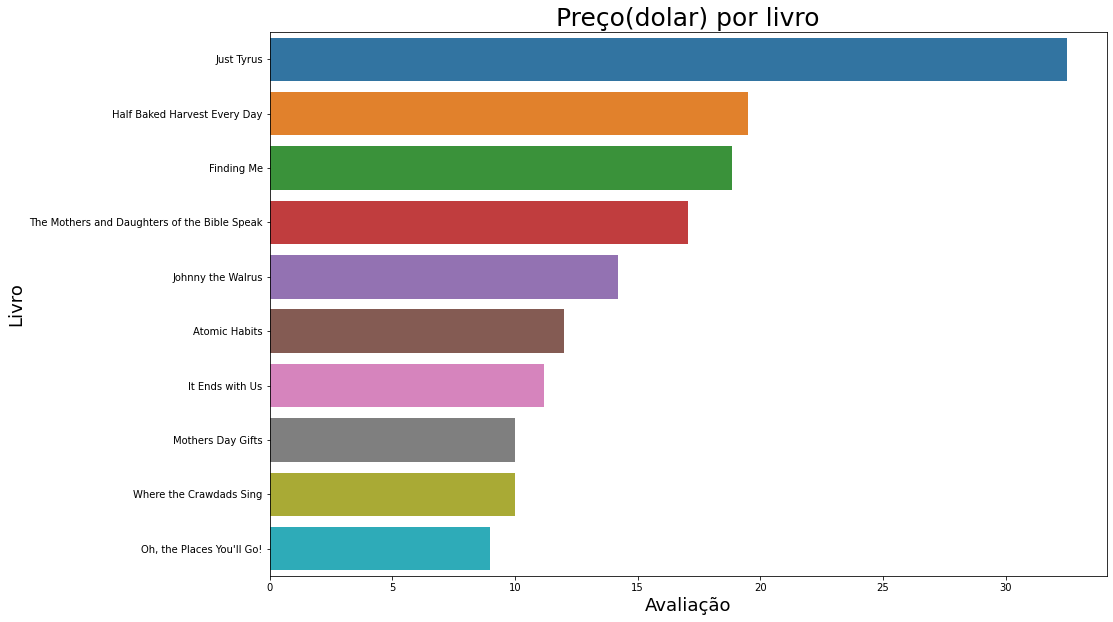

In [19]:
top_amazon = top_amazon.sort_values(by='Price', ascending=False)
plt.figure(figsize=(15,10))
ax = sns.barplot(data=top_amazon, x='Price', y='Book Name', )
ax.set_title('Preço(dolar) por livro', fontsize=25)
ax.set_xlabel('Avaliação', fontsize=18)
ax.set_ylabel('Livro', fontsize=18)
ax

<AxesSubplot:title={'center':'Avaliação Ponderada por livro'}, xlabel='Avaliação', ylabel='Livro'>

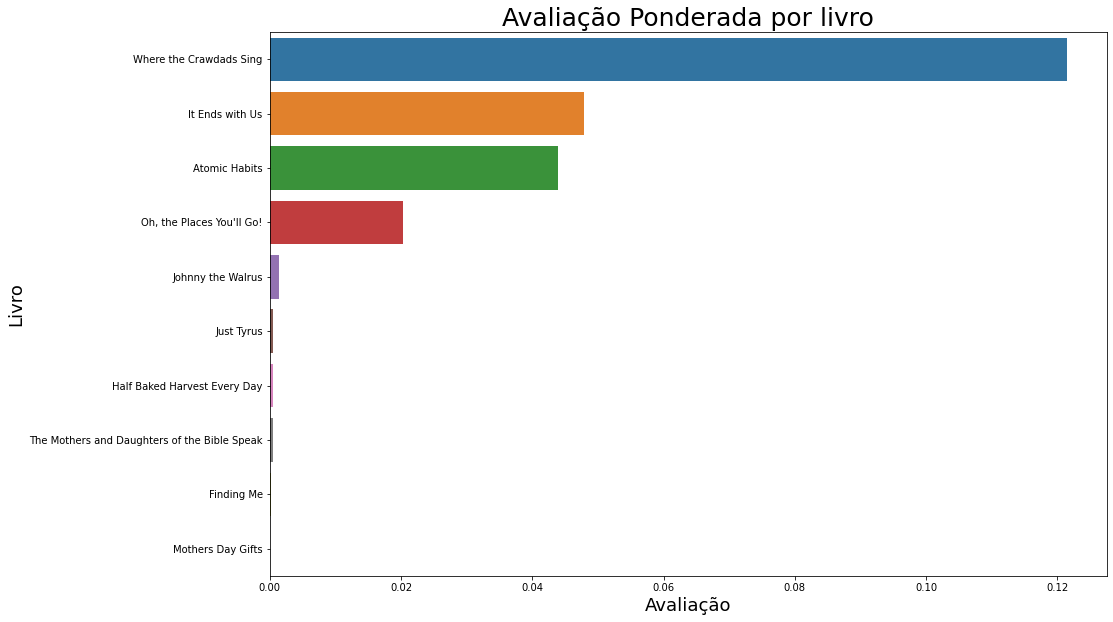

In [20]:
top_amazon = top_amazon.sort_values(by='W_Rating', ascending=False)
plt.figure(figsize=(15,10))
ax = sns.barplot(data=top_amazon, x='W_Rating', y='Book Name', )
ax.set_title('Avaliação Ponderada por livro', fontsize=25)
ax.set_xlabel('Avaliação', fontsize=18)
ax.set_ylabel('Livro', fontsize=18)
ax

62

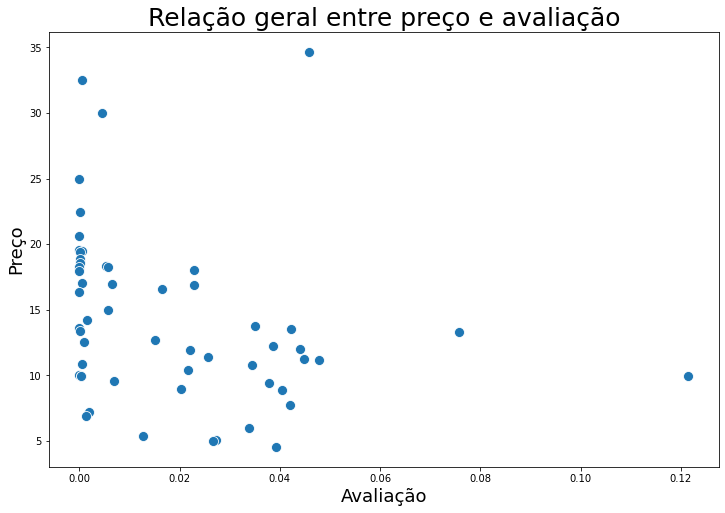

In [21]:
amazon = amazon.sort_values(by='Price', ascending=False)
plt.figure(figsize=(12,8))
ax = sns.scatterplot(data=amazon, x='W_Rating', y='Price',s=100)
ax.set_title('Relação geral entre preço e avaliação', fontsize=25)
ax.set_xlabel('Avaliação', fontsize=18)
ax.set_ylabel('Preço', fontsize=18)
a